# Plot CogPO
Plotting the structure of the Cognitive Paradigm Ontology.

In [ ]:
%matplotlib inline
from __future__ import division
import numpy as np
import seaborn as sns
import os
import pydotplus as pydot
import pandas as pd
import re
from cStringIO import StringIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Functions

In [1]:
def plot_hierarchy(observed_cogpo, domain_name, out_file):
    # first you create a new graph, you do that with pydot.Dot()
    graph = pydot.Dot(graph_type="graph", overlap=False)
    
    # Reduce labels to only look at Behavioral Domain, which is the only section
    # of CogPO with additional depth.
    observed_cogpo = [i[12:] for i in observed_cogpo if domain_name in i]
    
    proc_cogpo = observed_cogpo[:]
    for label in observed_cogpo:
        sections = label.split(".")
        for i in range(1, len(sections)):
            parent = ".".join(sections[:i])
            if parent not in proc_cogpo:
                proc_cogpo += [parent]
    
    for label in proc_cogpo:
        node_name = label
        node_label = '"' + label.split(".")[-1] + '"'
        graph.add_node(pydot.Node(node_name, label=node_label))
    
    for label in proc_cogpo:
        sections = label.split(".")
        if len(sections) > 1:
            parent = ".".join(sections[:-1])
            edge = pydot.Edge(parent, label)
            graph.add_edge(edge)

    # Render pydot by calling dot, no file saved to disk
    png_str = graph.create_png(prog='dot')

    # Treat the dot output string as an image file
    sio = StringIO()
    sio.write(png_str)
    sio.seek(0)
    img = mpimg.imread(sio)

    # Plot the image
    imgplot = plt.imshow(img, aspect='equal')
    plt.show(block=False)
    
    # Save figure
    graph.write_png(out_file)

In [19]:
# Plot hierarchy
labels_file = "/Users/salo/NBCLab/athena-data/labels/full.csv"
out_dir = "/Users/salo/NBCLab/athena-data/figures/"

df = pd.read_csv(labels_file)
observed_cogpo = df.columns[1:].astype(str).tolist()

In [20]:
# Behavioral Domain
out_file = os.path.join(out_dir, "behavioral_domain.png")
plot_hierarchy(observed_cogpo, "BehavioralDomain", out_file)

In [21]:
# Paradigm Class
out_file = os.path.join(out_dir, "paradigm_class.png")
plot_hierarchy(observed_cogpo, "ParadigmClass", out_file)

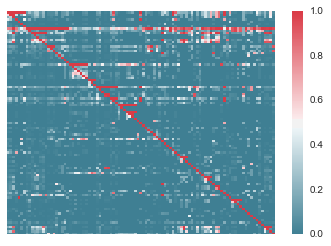

In [22]:
# Plot heatmap
data = df.values[:, 1:]

out = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        pos_i = np.where(data[:, i]==1)[0]
        pos_j = np.where(data[:, j]==1)[0]
        diff = np.setdiff1d(pos_j, pos_i).shape[0]
        if pos_j.shape[0] == 0:
            frac = 0
        else:
            frac = 1 - (diff / pos_j.shape[0])
        out[i, j] = frac

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plot = sns.heatmap(out, cmap=cmap, xticklabels=False, yticklabels=False)
fig = plot.get_figure()
fig.savefig(os.path.join(out_dir, "cogpo_correlations.png"))